
https://johncarlosbaez.wordpress.com/2020/10/08/roger-penroses-nobel-prize/

https://www.scientificamerican.com/article/how-andrea-ghez-won-the-nobel-for-an-experiment-nobody-thought-would-work/


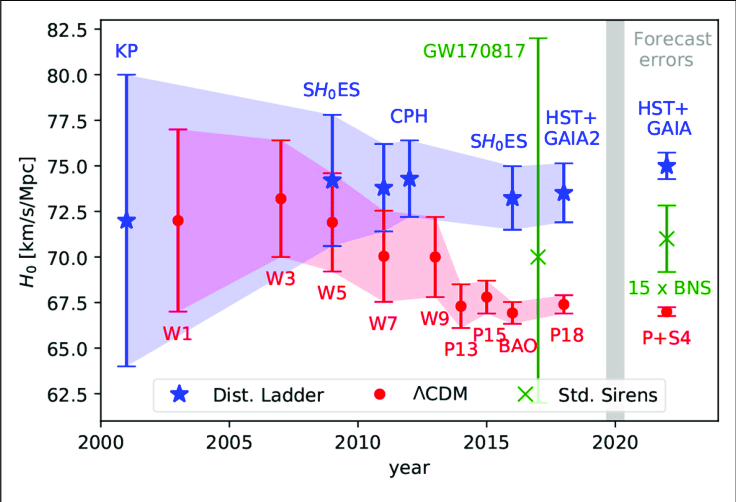

https://www.youtube.com/watch?v=hKJfX7vVzOI&t=1879s

# Bayesian Statistical Inference:


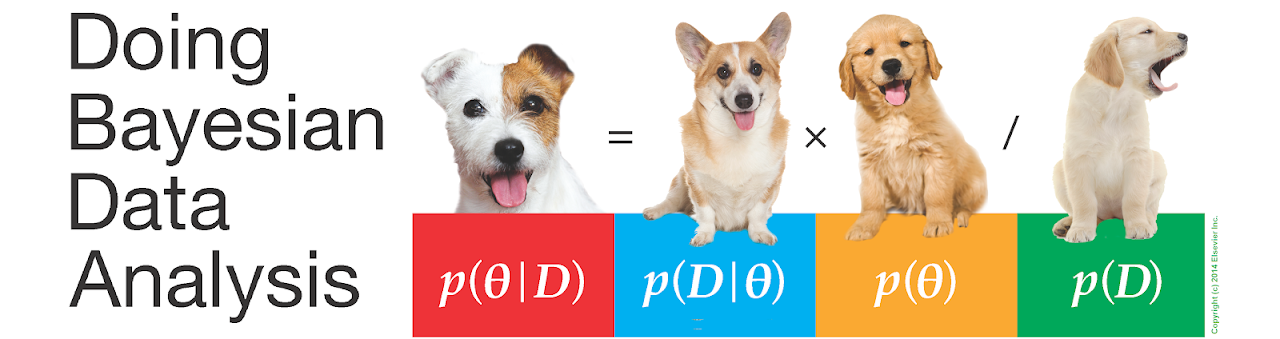

## Introduction to the Bayesian Method
The basic premise of the Bayesian method is that probability statements are not limited to data, but can be made for model parameters and models themselves.
Inferences are made by producing probability density functions (pdfs); most notably,
model parameters are treated as random variables.

The Bayesian method has gained wide acceptance over the last few decades, in
part due to maturing development of its philosophical and technical foundations,
and in part due to the ability to actually perform the required computations. The
Bayesian method yields optimal results, given all the available and explicitly declared
information, assuming, of course, that all of the supplied information is correct.

Bayes’ rule is simply a mathematical identity following from a straightforward application of the rules of probability. A completely Bayesian data analysis has the following conceptual steps:

$$max_{\phi} P(\phi | D, M)=max_{\phi} \frac{P(D|\phi, M)P(\phi| M)}{P(D|M)}$$

- 1. The formulation of the data likelihood $P(D|\phi, M)$. Of course, if the adopted is a poor description of this process, then the resulting posterior pdf will be inaccurate, too.

- 2. The choice of the prior $P(\phi |M, I )$, which incorporates all other knowledge
that might exist, but is not used when computing the likelihood (e.g., prior measurements of the same type, different measurements, or simply an unin formative prior, as discussed below).

- 3. The search for the best model parameters $\phi$, which maximize $p(\phi|D,M)$,
yielding the maximum a posteriori (MAP) estimate. This point estimate is
the natural analog to the maximum likelihood estimate (MLE) from classical
statistics. Another natural Bayesian estimator is the posterior mean:

$$\bar{\theta}=\int \theta p(\theta|D) d\theta$$

In multidimensional cases, $p(θ |D)$, where $\theta$ is one of many model parameters, is obtained from 
$P(\theta |D, M)$ using marginalization, or integration
over all other model parameters and renormalization $ p(\theta|D) d\theta = 1$. Both the MAP and posterior mean are only
convenient ways to summarize the information provided by the posterior pdf,
and often do not capture its full information content.

- 4. Quantification of uncertainty in parameter estimates, via credible regions (Bayesian counterpart to frequentist confidence regions). As in MLE, such an estimate can be obtained analytically by doing mathematical derivations
specific to the chosen model. Also as in MLE, various numerical techniques can be used to simulate samples from the posterior. 

- 5. Hypothesis testing as needed to make other conclusions about the model or parameter estimates. Unlike hypothesis tests in classical statistics, in Bayesian inference hypothesis tests incorporate the prior and thus may give different
results. The Bayesian approach can be thought of as formalizing the process of continually refining our state of knowledge about the world, beginning with no data (as encoded by the prior), then updating that by multiplying in the likelihood once the data $D$ are observed to obtain the posterior.

Indeed, the data sets can be fundamentally different: for example, when estimating
cosmological parameters using observations of supernovas, the prior often comes from measurements of the cosmic microwave background, the distribution of large scale structure, or both. https://academic.oup.com/mnras/article/366/1/189/1060187




## Motivating example
We will use the toy example of estimating the bias of a coin given a sample consisting of n tosses to illustrate a few of the approaches.

If we use a beta distribution as the prior, then the posterior distribution has a closed form solution. This is shown in the example below. Some general points:

We need to choose a prior distribution family (i.e. the beta here) as well as its parameters (here a=10, b=10)
The prior distribution may be relatively uninformative (i.e. more flat) or informative (i.e. more peaked)

The posterior depends on both the prior and the data. As the amount of data becomes large, the posterior approximates the MLE.
An informative prior takes more data to shift than an uninformative one. Of course, it is also important the model used (i.e. the likelihood) is appropriate for the fitting the data.

The mode of the posterior distribution is known as the maximum a posteriori (MAP) estimate (cf MLE which is the mode of the likelihood)

61.0


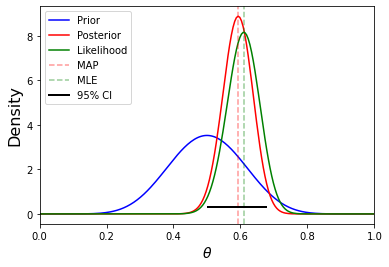

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n = 100
h = 61
p = h/n
rv = stats.binom(n, p)
mu = rv.mean()
print(mu)

a, b = 10, 10
prior = stats.beta(a, b)
post = stats.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend(loc='upper left')
pass


### Numerical integration
One simple way of numerical integration is to estimate the values on a grid of values for $\theta$. To calculate the posterior, we find the prior and the likelihood for each value of $\theta$, and for the marginal likelihood, we replace the integral with the equivalent sum

$$p(X) = \sum_{\theta^*} p(X | \theta^*) p(\theta^*)$$

One advantage of this is that the prior does not have to be conjugate (although the example below uses the same beta prior for ease of comparison), and so we are not restricted in our choice of an appropriate prior distribution. For example, the prior can be a mixture distribution or estimated empirically from data. The disadvantage, of course, is that this is computationally very expensive when we need to estimate multiple parameters, since the number of grid points grows as $O(n^d)$, where n defines the grid resolution and d is the size of θ.


## Curse of Dimensionality

Let's say that we wanteed to do second-order polynomial fit. In 1D is simply $y=a_0+a_1x+a_2x^2$, in 2D, we have $y=a_0+a_1x_1+a_2x_2+a_3x_1x_2+a_4x_1^2+a_5x_2^2$, i.e. 6 terms and in D dimensions, we need 1+2D+D(D-1)/2 terms.

THis rapid increase of the number of terms requiered is an example of the curse of dimensionality. Because of this many algorithms that give an impresive results for a low dimensional test problem fail miserably for a realistic high dimensional problem.


The reason to use nonlinear coefficients is to avoid the curse. There is another sense of the curse of dimensionality to b mindful of. In a high dimensional space, everthing is surface. 
To understand this consider the volume of a hyper sphere of radius $r$ in a D-dimensional space:

$$V=\frac{\pi^{D/2}r^D}{(D/2)!}$$

non integer factorials are defined by the gamma function $\Gamma(n+1)=n!$. Now let's look at the fraction of volume in shell of thickness $\epsilon$, compared to the total volume of the sphere in the limit $D\rightarrow\infty$:

$$\frac{V(r)-V(r-\epsilon)}{V(r)}=\frac{r^D-(r-\epsilon)^D}{r^D}=1-(1-\frac{\epsilon}{r})^D=1$$

As $D\rightarrow\infty$ all the volume is in the thin shell near the surface. Now think about what this implies for points there. In a huge dataset there migth not be a single point in the interior of the distribution, and so the analysis will be dominated by edge effects.

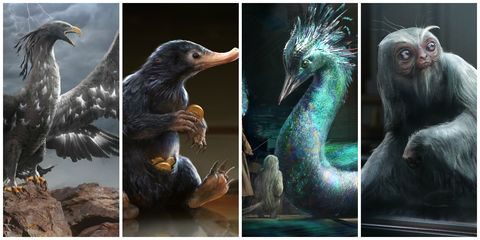



## Bayesian Priors
How do we choose the prior $p(\theta |M )$? The prior incorporates
all other knowledge that might exist, but is not used when computing the likelihood,
$p(D|M, \theta)$. To reiterate, despite the name, the data may chronologically precede the information in the prior.
The latter can include the knowledge extracted from prior measurements of the same type as the data at hand, or different measurements that constrain the same quantity whose posterior pdf we are trying to constrain with the new data. For example, we may know from older work that the mass of an elementary particle is $m_{A}$ , with a Gaussian uncertainty parametrized by $\sigma_{A}$ , and now we wish to utilize a new measuring apparatus or method. Hence, $m_{A}$ and $\sigma_{A}$ may represent a convenient summary of the posterior pdf from older work that is now used as a prior for the new measurements.
 Therefore, the terms prior and posterior do not have an absolute meaning. Such priors that incorporate information based
on other measurements (or other sources of meaningful information) are called **informative priors**.

### Priors Assigned by Formal Rules
When no other information, except for the data we are analyzing, is available, we can assign priors by formal rules. Sometimes these priors are called **uninformative priors**
but this term is a misnomer because these priors can incorporate weak but objective information such as “the model parameter describing variance cannot be negative.”

Note that even the most uninformative priors still affect the estimates, and the results
are not generally equivalent to the frequentist or maximum likelihood estimates. As an example, consider a flat prior, $ p(\theta | M ) ∝ C$, where $C>0$ is a constant.

Since $\int p(\theta |M ) d\theta = \infty$, this is not a pdf; this is an example of an improper prior. In general, improper priors are not a problem as long as the resulting posterior is a well-defined pdf (because the likelihood effectively
controls the result of integration). Alternatively, we can adopt a lower and an upper limit on $\theta$ which will prevent the integral from diverging (e.g., it is reasonable to
assume that the mass of a newly discovered elementary particle must be positive and smaller than the Earth’s mass).

### The Principle of Maximum Entropy
Entropy measures the information content of a pdf. We shall use S as the symbol for
entropy. Given a pdf defined by N discrete
values $p_{i}$ , with $\sum_{i=1}^{N} p_{i}=1$, its entropy is defined as:

$$S=-\sum_{i=1}^{N} p_{i} ln(p_{i})$$

It is also called Shannon’s entropy because Shannon was the first one to derive it in the context of information in 1948. It resembles thermodynamic entropy: this observation is how it got its name.

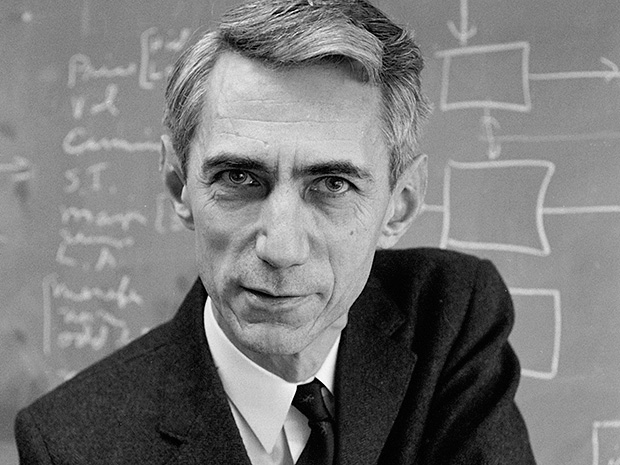

The idea behind the principle of maximum entropy for assigning uninformative priors is that by maximizing the entropy over a suitable set of pdfs, we find the distribution that is least informative (given the constraints). The power of the principle comes from a straightforward ability to add additional information about
the prior distribution, such as the mean value and variance.

## Bayesian Parameter Uncertainty Quantification
The posterior pdf in the Bayesian framework is treated as any other probabilistic pdf. In practice, it is often summarized in terms of various point estimates (e.g., MAP) or in terms of parameter intervals defined by certain properties of cumulative probability. Although very useful in practice, these summaries rarely capture the full information content of a posterior pdf.

### Posterior Intervals
To obtain a Bayesian **credible region estimate**, we find $a$ and $b$ such that:

$$\int_{-\infty}^{a}f(\theta)d\theta=\int_{b}^{\infty}f(\theta)d\theta=\alpha/2$$

Then the probability that the true value of
parameter $\theta$ is in the interval ($a, b$) is equal to $1 − \alpha$, in analogy with the classical confidence intervals, and the interval ($a, b$) is called a $1 − \alpha$ posterior interval.

In practice, the posterior pdf, $p(\theta)$, is often not an analytic function (e.g., it can
only be evaluated numerically). In such cases, we can compute statistics such as the
posterior mean and the $1 − \alpha$ posterior interval, using simulation (sampling). If we
know how to compute $p(\theta)$, then we can use the techniques for random number generation to draw $N$ values $\theta_{j}$ . Then we can approximate the posterior mean as the sample mean, and approximate the $1 − \alpha$ posterior interval by finding $\alpha/2$ and $(1−\alpha/2)$ sample quantiles.


### Marginalization of Parameters

Consider a problem where the model in the posterior pdf, $p(\theta |D, M )$, is para-
metrized by a vector of $k$ free parameters, $\theta$ . A subset of these parameters are of
direct interest, while the remaining parameters are used to describe certain aspects of
data collection that are not of primary interest. For example, we might be measuring
the properties of a spectral line (position, width, strength) detected in the presence
of an unknown and variable background. We need to account for the background when describing the statistical behavior of our data, but the main quantities of interest are the spectral line properties. In order to obtain the posterior pdf for each interesting parameter, we can integrate the multidimensional posterior pdf over all other parameters. 

Alternatively, if we want to understand covariances between interesting parameters, we can integrate the posterior pdf only over uninteresting parameters called **nuisance parameters**. This integration procedure is known as **marginalization** and the resulting pdf is called the **marginal posterior pdf**.

## Bayesian Model Selection
Bayes’ theorem quantifies the posterior pdf of parameters describing a single model, with that model assumed to be true. In model selection
and hypothesis testing, we formulate alternative scenarios and ask which ones are
best supported by the available data. For example, we can ask whether a set of
measurements {$x_{i}$} is better described by a Gaussian or by a Cauchy distribution,
or whether a set of points is better fit by a straight line or a parabola.

To find out which of two models, say $M_{1}$ and $M_{2}$, is better supported by data,
we compare their posterior probabilities via the odds ratio in favor of model $M_{2}$ over
model $M_{1}$ as:

$$O_{21}=\frac{p(\theta_{2}| D, M_{2})}{p(\theta_{1}| D, M_{1})}$$

$$O_{21}=\frac{\int p(D|\phi_{2}, M_{2})p(\phi_{2}| M_{2}) d\theta_{2}}{\int p(D|\phi_{1}, M_{1})p(\phi_{1}| M_{1}) d\theta_{1}}$$

How do we interpret the values of the odds ratio in practice? Jeffreys proposed a five-step scale for interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_{2}$, and $O_{21} > 100$ is “decisive” evidence. When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

As a practical example, let us consider coin flipping again. We will compare two hypotheses; $M_{1}$ : the coin has a known heads
probability $b_{∗}$ , and $M_{2}$ : the heads probability $b$ is unknown, with a uniform prior in the range 0–1. Note that the prior for model $M_{1}$ is a delta function, $\delta(b − b_{∗})$. Let us assume that we flipped the coin $N$ times, and obtained $k$ heads. Using a Binomial distribution for the data likelihood, and assuming equal prior probabilities for the two models, it is easy to show that the odds ratio is:

$$O_{21}=\int_{0}^{1}(\frac{b}{b_{*}})^{k}(\frac{1-b}{1-b_{*}})^{N-k}$$



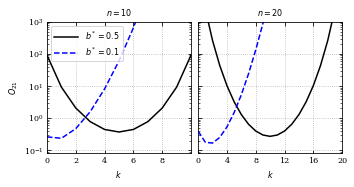

In [ ]:
"""
Coin Toss Odds Ratio
--------------------
Figure 5.1
Odds ratio for two models, :math:`O_{21}`, describing coin tosses (eq. 5.26).
Out of N tosses (left: N = 10; right: N = 20), k tosses are heads. Model 2 is
a one-parameter model with the heads probability determined from data
(:math:`b^0 = k/N`), and model 1 claims an a priori known heads probability
equal to :math:`b_*`.The results are shown for two values of :math:`b_*`,
as indicated in the legend. Note that the odds ratio is minimized and below 1
(model 1 wins) when :math:`k = b_* N`.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


@np.vectorize
def odds_ratio(n, k, bstar):
    """Odds ratio between M_2, where the heads probability is unknown,
    and M_1, where the heads probability is known to be `bstar`, evaluated
    in the case of `k` heads observed in `n` tosses.
    Eqn. 5.25 in the text
    """
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)

    return factor * integrate.quad(f, 0, 1)[0]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 20]

linestyles = ['-k', '--b']
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    ax = fig.add_subplot(subplot, yscale='log')
    k = np.arange(n + 1)

    # plot curves for two values of bstar
    for ls, bstar in zip(linestyles, bstar_array):
        ax.plot(k, odds_ratio(n, k, bstar), ls,
                label=r'$b^* = %.1f$' % bstar)

    if subplot == 121:
        ax.set_xlim(0, n - 0.01)
        ax.set_ylabel(r'$O_{21}$')
        ax.legend(loc=2)
    else:
        ax.set_xlim(0, n)
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel('$k$')
    ax.set_title('$n = %i$' % n)
    ax.set_ylim(8E-2, 1E3)
    ax.xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    ax.grid()


plt.show()


## Bayesian Hypothesis Testing
A special case of model comparison is Bayesian hypothesis testing. In this case,
$M_{2}$ is a complementary hypothesis to $M_{1}$ (i.e., $p(M_{1}) + p(M_{2}) = 1$). Taking
$M_{1}$ to be the “null” hypothesis, we can ask whether the data supports the alternative
hypothesis $M_{2}$ , i.e., whether we can reject the null hypothesis. Taking equal priors, the odds ratio is:

$$O_{21}=\frac{P(D|M_{1})}{P(D|M_{2})}$$

Going back to our coin example, assume we flipped the coin N = 20 times and
obtained k = 16 heads. In the classical formulation, we would ask whether we can
reject the null hypothesis that our coin is fair. In other words, we would ask whether
k = 16 is a very unusual outcome ((at some significance level $\alpha$, say 0.05)
Of course, k = 16 does not imply that it is impossible that the coin is fair
(infrequent events happen, too!)

In the Bayesian approach, we offer an alternative hypothesis that the coin has an
unknown heads probability. While this probability can be estimated from provided
data $b_{0}$, we consider all the possible values of $b_{0}$ when comparing the two proposed
hypotheses. As shown in figure 5.1, the chosen parameters (N = 20, k = 16) correspond to the Bayesian odds ratio of ∼10 in favor of the unfair coin hypothesis.

## Occam’s Razor
The principle of selecting the simplest model that is in fair agreement with the
data is known as Occam’s razor. This principle was already known to Ptolemy who
said, “We consider it a good principle to explain the phenomena by the simplest
hypothesis possible”. Hidden in the above expression for the odds ratio is its
ability to penalize complex models with many free parameters; that is, Occam’s razor
is naturally included into the Bayesian model comparison.

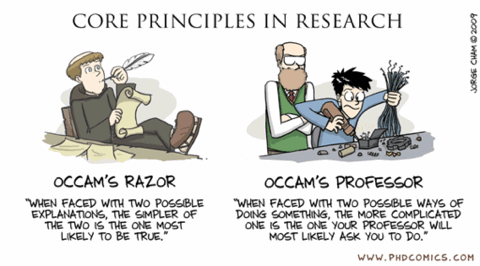

### Information Criteria
The Bayesian information criterion (BIC, also known as the Schwarz criterion) is
a concept closely related to the odds ratio, and to the Aikake information criterion. The BIC attempts to simplify the computation of the
odds ratio by making certain assumptions about the likelihood, such as Gaussianity
of the posterior pdf; for details and references, see https://arxiv.org/abs/astro-ph/0701113. The BIC is easier to compute
and, similarly to the AIC, it is based on the maximum value of the data likelihood,
$L^{0} (M)$, rather than on its integration over the full parameter space (evidence E). The BIC for a given model M is computed as:

$$BIC=-2 ln(L^{0}(M))+k ln(N)$$

where $k$ is the number of model parameters and $N$ is the number of data points.
The BIC corresponds to −2 ln[E (M)] (to make it consistent with the AIC).

When two models are compared, their BIC (or AIC) are compared analogously to the odds ratio, that is, the model with the smaller value wins (sometimes BIC and AIC are defined with an opposite sign, in which case the model with the largest value wins). If they are equally successful in describing the data (the first term above), then the model with fewer free parameters wins. Note that the BIC penalty for additional model parameters is stronger than for the AIC when N is sufficiently large (10–20,
depending on k); very complex models are penalized more severely by the BIC than
by the AIC.

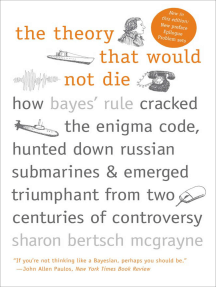

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 5.3MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=b1186d3c77704f65005a151ab47ae0580d9400e46a83409cb256307d7b40de97
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML
